# Week 09

In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf

# 문제 1

In [299]:
!mkdir -p ~/data
%cd ~/data
!wget http://www.stat.tamu.edu/~sheather/book/docs/datasets/cars04.csv

/home/jihoon_kim/data
--2017-07-10 10:55:56--  http://www.stat.tamu.edu/~sheather/book/docs/datasets/cars04.csv
Resolving www.stat.tamu.edu (www.stat.tamu.edu)... 165.91.112.167
Connecting to www.stat.tamu.edu (www.stat.tamu.edu)|165.91.112.167|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16427 (16K) [text/csv]
Saving to: ‘cars04.csv.10’

cars04.csv.10       100%[===================>]  16.04K  89.4KB/s    in 0.2s    

2017-07-10 10:55:57 (89.4 KB/s) - ‘cars04.csv.10’ saved [16427/16427]



In [300]:
df = pd.read_csv("~/data/cars04.csv")
df = df[["SuggestedRetailPrice", "EngineSize", "Cylinders", "Horsepower", "HighwayMPG", "Weight", "WheelBase", "Hybrid"]]
df.tail()

,SuggestedRetailPrice,EngineSize,Cylinders,Horsepower,HighwayMPG,Weight,WheelBase,Hybrid
229,40670,2.0,4,210,29,3480,105,0
230,43175,2.0,4,210,30,3700,105,0
231,40565,2.4,5,197,28,3450,105,0
232,42565,2.3,5,242,26,3450,105,0
233,45210,2.9,6,268,26,3653,110,0


In [301]:
target = "SuggestedRetailPrice"
ind_var = ["EngineSize", "Cylinders", "Horsepower", "HighwayMPG", "Weight", "WheelBase", "Hybrid"]
formula = target + "~" + "+".join(ind_var)
formula

'SuggestedRetailPrice~EngineSize+Cylinders+Horsepower+HighwayMPG+Weight+WheelBase+Hybrid'

In [302]:
categorized_form = 'SuggestedRetailPrice~EngineSize+C(Cylinders)+Horsepower+HighwayMPG+Weight+WheelBase+C(Hybrid)-1'
model = smf.ols(formula=categorized_form, data=df)
result = model.fit()
print(result.summary())

                             OLS Regression Results                             
Dep. Variable:     SuggestedRetailPrice   R-squared:                       0.828
Model:                              OLS   Adj. R-squared:                  0.819
Method:                   Least Squares   F-statistic:                     97.07
Date:                  Mon, 10 Jul 2017   Prob (F-statistic):           2.22e-78
Time:                          10:55:58   Log-Likelihood:                -2389.2
No. Observations:                   234   AIC:                             4802.
Df Residuals:                       222   BIC:                             4844.
Df Model:                            11                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
C(Cylinders)[3]  -3.

## $R^2 >=0.85$

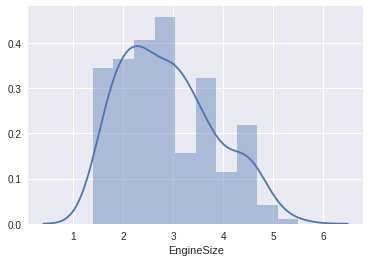

In [303]:
sns.distplot(df.EngineSize)

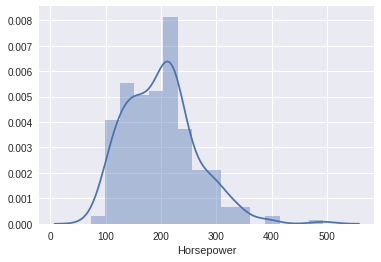

In [304]:
sns.distplot(df.Horsepower)

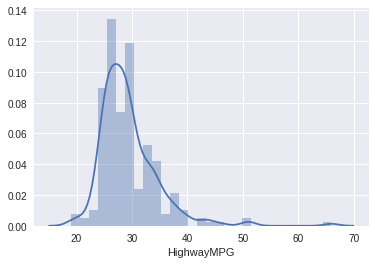

In [305]:
sns.distplot(df.HighwayMPG)

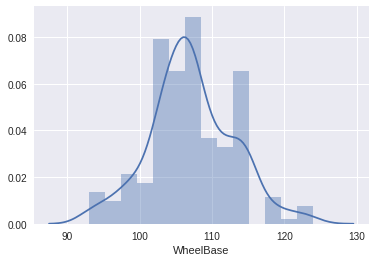

In [306]:
sns.distplot(df.WheelBase)

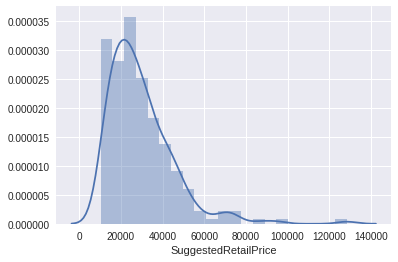

In [307]:
sns.distplot(df.SuggestedRetailPrice)

y값이 skew되어 있고 타변수 대비 값자체가 크므로 log변환을 한다

In [308]:
categorized_form_adj = 'np.log(SuggestedRetailPrice)~EngineSize+C(Cylinders)+Horsepower+HighwayMPG+Weight+WheelBase+C(Hybrid)'
model_adj = smf.ols(formula=categorized_form_adj, data=df)
result_adj = model_adj.fit()
print(result_adj.summary())

                                 OLS Regression Results                                 
Dep. Variable:     np.log(SuggestedRetailPrice)   R-squared:                       0.882
Model:                                      OLS   Adj. R-squared:                  0.877
Method:                           Least Squares   F-statistic:                     151.5
Date:                          Mon, 10 Jul 2017   Prob (F-statistic):           1.23e-96
Time:                                  10:55:59   Log-Likelihood:                 93.420
No. Observations:                           234   AIC:                            -162.8
Df Residuals:                               222   BIC:                            -121.4
Df Model:                                    11                                         
Covariance Type:                      nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

예측값(로그상태)

In [309]:
result_adj.fittedvalues.tail(5)

229    10.457249
230    10.596142
231    10.268183
232    10.479488
233    10.690800
dtype: float64

예측값)

In [310]:
np.exp(result_adj.fittedvalues.tail(5))

229    34795.704560
230    39980.282846
231    28801.519899
232    35578.169252
233    43949.636463
dtype: float64

실제가격)

In [311]:
df.SuggestedRetailPrice.tail(5)

229    40670
230    43175
231    40565
232    42565
233    45210
Name: SuggestedRetailPrice, dtype: int64

## Scatter Plot

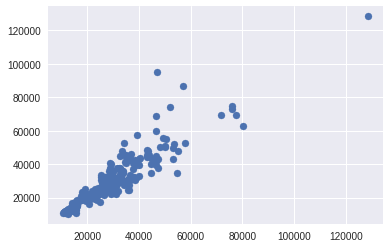

In [312]:
plt.scatter(np.exp(result_adj.fittedvalues), df.SuggestedRetailPrice)

# 문제 2

In [313]:
import statsmodels.api as sm
df = sm.datasets.get_rdataset("deaths", "MASS").data
df["y"] = df["deaths"]
del df["deaths"]
df.tail()

,time,y
67,1979.583333,1354
68,1979.666667,1333
69,1979.750000,1492
70,1979.833333,1781
71,1979.916667,1915


In [314]:
def yearfraction2datetime(yearfraction, startyear=0):
    import datetime, dateutil
    year = int(yearfraction) + startyear
    month = int(round(12 * (yearfraction - year)))
    delta = dateutil.relativedelta.relativedelta(months=month)
    date = datetime.datetime(year, 1, 1) + delta
    return date

In [315]:
df["datetime"] = df.time.map(yearfraction2datetime)
df["month"] = df.datetime.dt.month
df.tail()

,time,y,datetime,month
67,1979.583333,1354,1979-08-01,8
68,1979.666667,1333,1979-09-01,9
69,1979.750000,1492,1979-10-01,10
70,1979.833333,1781,1979-11-01,11
71,1979.916667,1915,1979-12-01,12


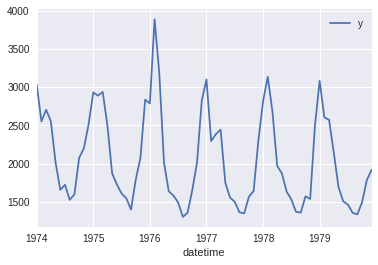

In [316]:
df.plot(x="datetime", y="y")
plt.show()

## 추세추정

In [317]:
from statsmodels.regression.linear_model import OLS
result = OLS.from_formula('y ~ C(month) -1', data=df).fit()

predicted = result.predict(df)
df_pred = pd.Series(predicted, name="predicted")
df = pd.concat([df, df_pred], axis=1)

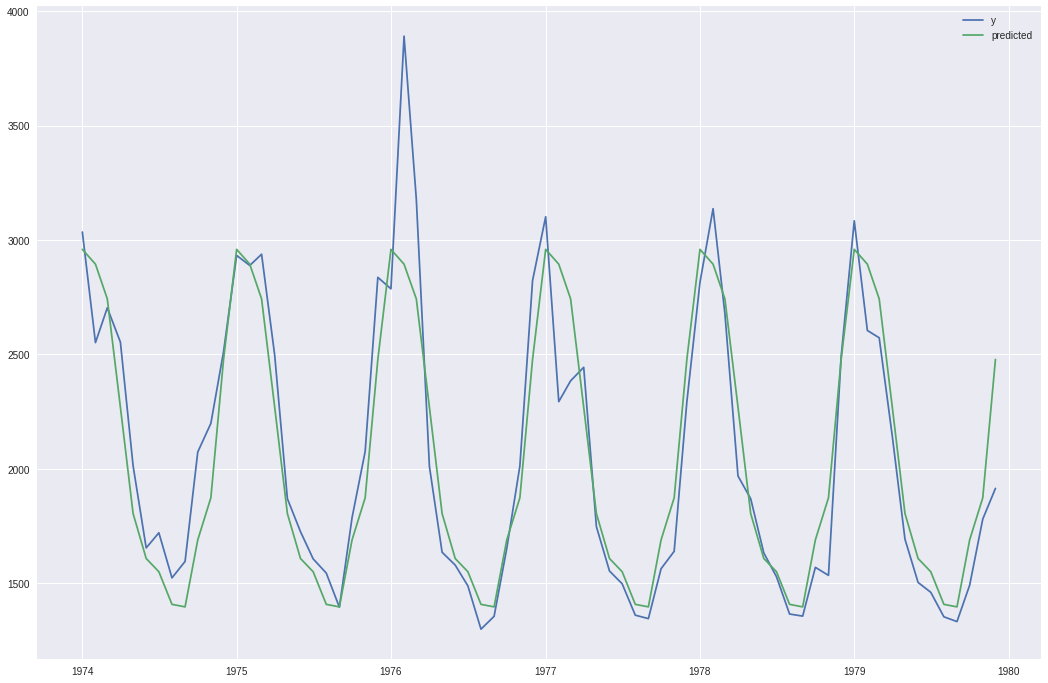

In [318]:
plt.figure(figsize=(18,12))
plt.plot(df["datetime"], df["y"], label="y")
plt.plot(df["datetime"], df["predicted"], label="predicted")
plt.legend()
plt.show()

In [319]:
residual = df.y - df.predicted
residual.tail()

67    -54.333333
68    -64.333333
69   -198.000000
70    -93.000000
71   -563.500000
dtype: float64

## Residuals

<Container object of 3 artists>

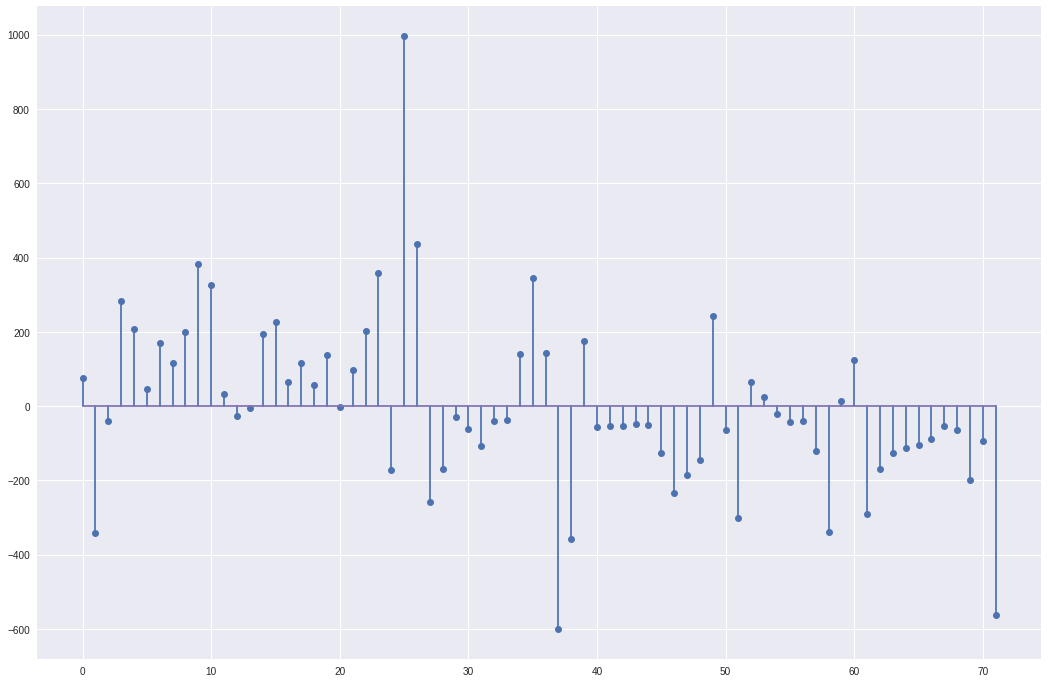

In [320]:
plt.figure(figsize=(18,12))
plt.stem(residual)